In [141]:
import requests;                                 # import package used to downlaod data from a web URL
import json;
import pandas as pd;
import matplotlib.pyplot as plt;
import matplotlib;
import datetime as dt
import time
import numpy as np

from pandas.io.json import json_normalize

matplotlib.style.use('ggplot');
%matplotlib inline

In [142]:
qualityDict = {0 : 'Normal', 1 : 'Genuine', 2 : 'Unused', 3 : 'Vintage', 4 : 'Unused', 5 : 'Unusual', 6 : 'Unique', 7 : 'Unused', 8 : 'Unused', 9 : 'Keys', 10 : 'Unused', 11 : 'Strange', 12 : 'Unused', 13 : 'Haunted', 14 : 'Collectors', 15 : 'Unused'}

In [143]:
dfIn = pd.read_csv('itemhistoryUSD.csv', dtype={'Craft':str, 'DateTime':dt.datetime, 'DefIndex':np.float64, 'Name':str,
                                            'PriceIndex':str, 'QualInt':np.int64, 'Trade':str, 'currency':str,
                                            'timestamp':np.float64, 'value':np.float64, 'value_high':np.float64})
dfIn['DateTime'] = pd.to_datetime(dfIn['DateTime'])
dfIn = dfIn.set_index(['Name', 'DefIndex', 'QualInt', 'Trade', 'Craft', 'PriceIndex'])
dfIn.sort_index(inplace = True)
df2 = dfIn.reset_index()

In [144]:
item_counts=df2['Name'].value_counts()
#item_counts

In [145]:
count = 0
mostPopular = []
for key, value in item_counts.iteritems():
    if count == 5: #We only want the 5 most common
        break
    mostPopular.append(key)
    count = count + 1

In [146]:
mostPopular

['Earbuds',
 'Team Captain',
 "Villain's Veil",
 "Master's Yellow Belt",
 'Exquisite Rack']

In [147]:
df5 = df2.query("Name in @mostPopular")

In [148]:
#df5.plot(x=df5['DateTime'], y=df5['value'])

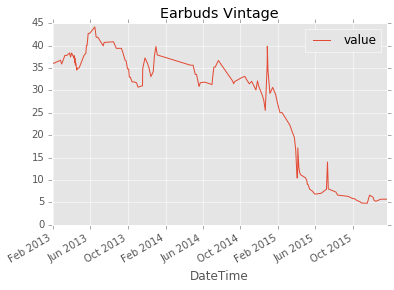

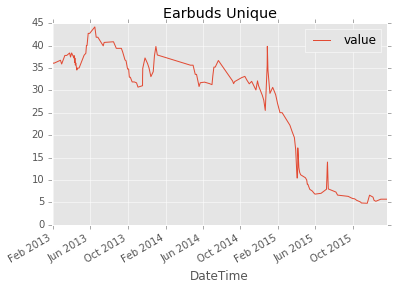

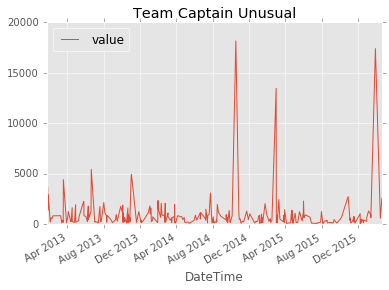

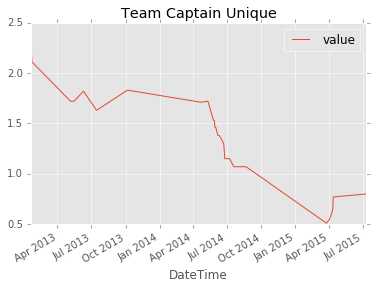

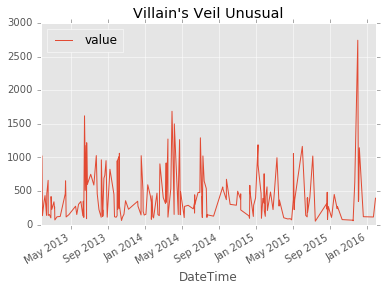

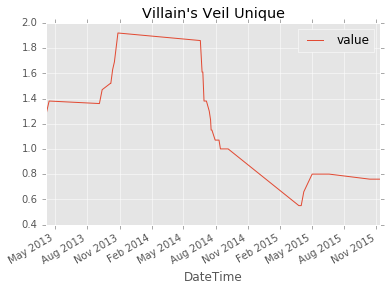

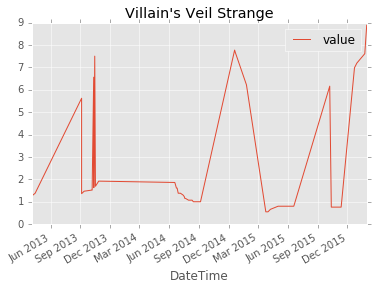

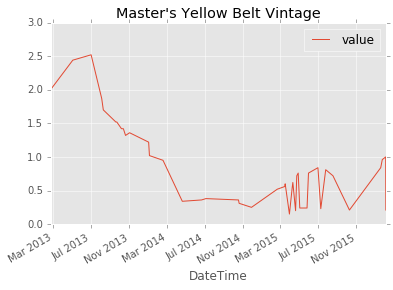

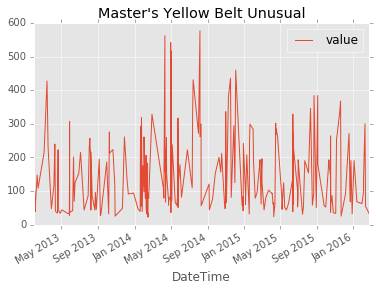

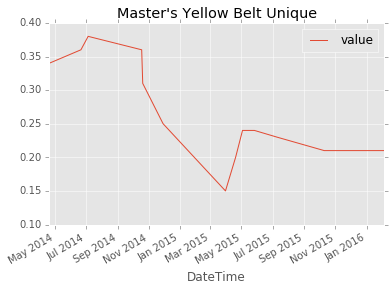

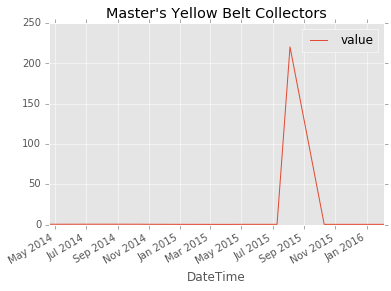

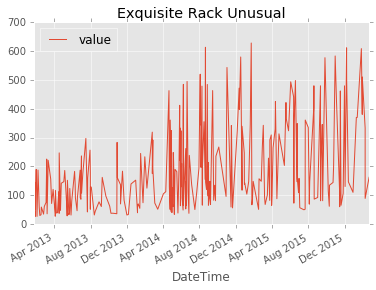

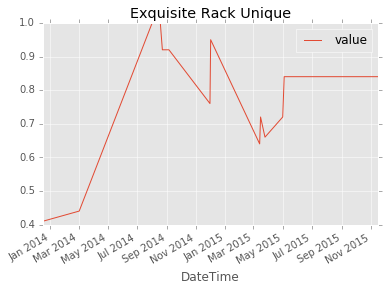

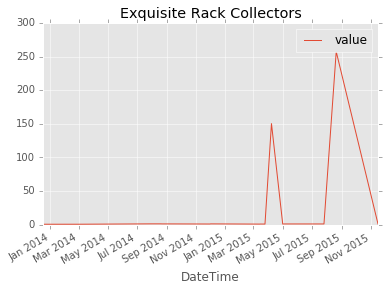

In [149]:
for item in mostPopular:
    plot1 = df5[df5.Name == item]
    plot1Qual = plot1.QualInt.drop_duplicates('last')
    #print item
    for quality in plot1Qual:
        plot2 = plot1[plot1.QualInt == quality]
        #print quality
        qualityString = None
        for key, value in qualityDict.iteritems():
            if (key == quality):
                qualityString = qualityDict[quality]
        titl = item + " " + str(qualityString)
        plot2.plot(x='DateTime',y='value',title=titl)

In [150]:
#df2[df2['QualInt']==13].head(100)

In [151]:
#Dealing with Haunted Items -- For Halloween Significance
dfHaunt = df2.copy()
dfHaunt = dfHaunt[dfHaunt['QualInt']==13]

In [152]:
haunted_counts = dfHaunt['Name'].value_counts()
#haunted_counts

In [153]:
count = 0
mostPopularHaunted = []
for key, value in haunted_counts.iteritems():
    if count == 5: #We only want the 5 most common
        break
    mostPopularHaunted.append(key)
    count = count + 1

In [154]:
mostPopularHaunted

['Voodoo-Cursed Sniper Soul',
 'Fallen Angel',
 'Haunted Hat',
 'Voodoo-Cursed Demoman Soul',
 'Voodoo-Cursed Pyro Soul']

In [155]:
dfHauntedFilter = df2.query("Name in @mostPopularHaunted")

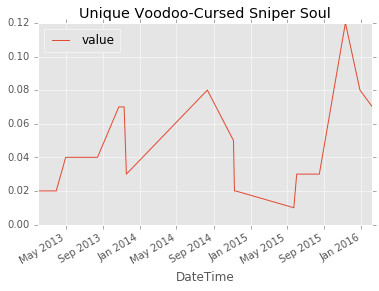

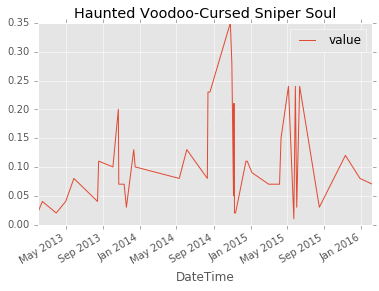

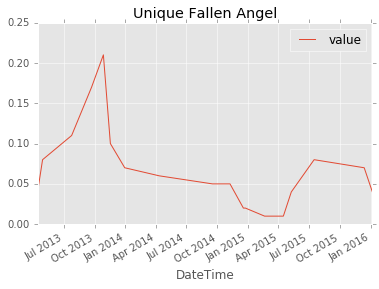

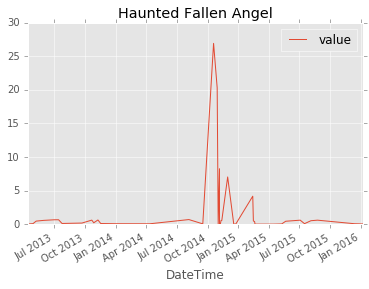

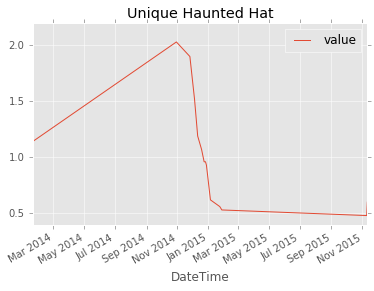

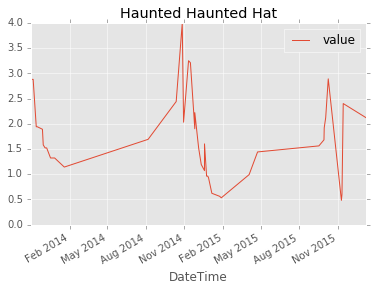

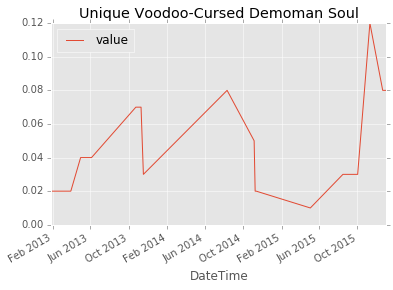

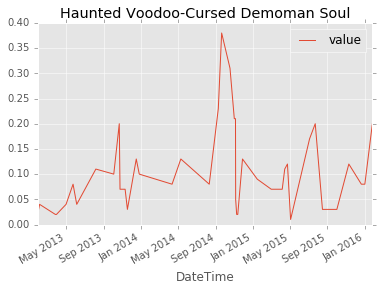

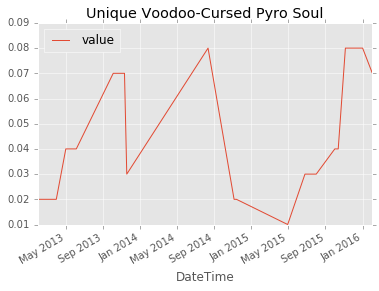

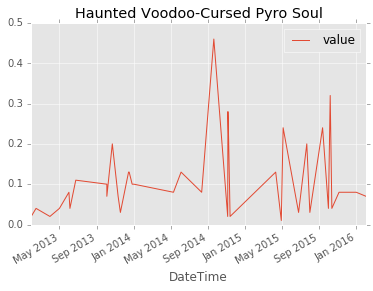

In [156]:
for item in mostPopularHaunted:
    plot1 = dfHauntedFilter[dfHauntedFilter.Name == item]
    plot1Qual = plot1.QualInt.drop_duplicates('last')
    for quality in plot1Qual:
        plot2 = plot1[plot1.QualInt == quality]
        qualityString = None
        for key, value in qualityDict.iteritems():
            if (key == quality):
                qualityString = qualityDict[quality]
        titl = str(qualityString) + " " + item
        plot2.plot(x='DateTime',y='value',title=titl)

In [157]:
# Dealing with Vintage Items - We'll observe how they changed over time

In [158]:
dfVintage = df2.copy()
dfVintage = dfVintage[dfVintage['QualInt']==3]

In [159]:
vintage_counts = dfVintage['Name'].value_counts()
vintage_counts

Earbuds                         135
Max's Severed Head               51
Big Kill                         50
Bill's Hat                       46
Prussian Pickelhaube             45
Master's Yellow Belt             43
Magistrate's Mullet              41
Pyro's Beanie                    39
Ghastlierest Gibus               37
Vintage Tyrolean                 34
Whoopee Cap                      34
Refined Metal                    32
Stainless Pot                    31
Camera Beard                     30
Backbiter's Billycock            30
Bonk Helm                        30
Soldier's Stash                  30
Frenchman's Beret                29
Vintage Merryweather             29
Glengarry Bonnet                 25
Hotrod                           25
Lumbricus Lid                    25
Mining Light                     24
Bloke's Bucket Hat               23
Baseball Bill's Sports Shine     22
Fancy Fedora                     22
Gentle Manne's Service Medal     20
Loch-n-Load                 

In [160]:
count = 0
mostPopularVintage = []
for key, value in vintage_counts.iteritems():
    if count == 5: #We only want the 5 most common
        break
    mostPopularVintage.append(key)
    count = count + 1

In [161]:
mostPopularVintage

['Earbuds',
 "Max's Severed Head",
 'Big Kill',
 "Bill's Hat",
 'Prussian Pickelhaube']

In [162]:
dfHauntedFilter = df2.query("Name in @mostPopularVintage")

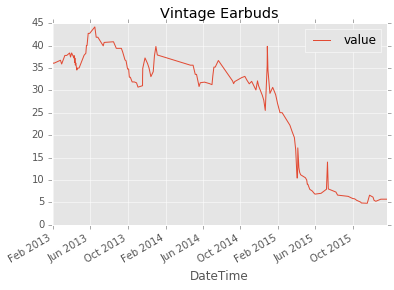

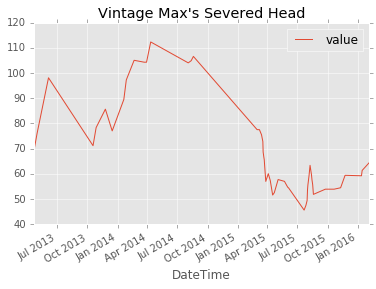

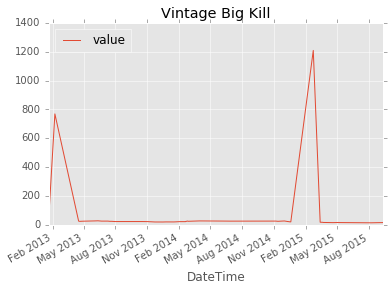

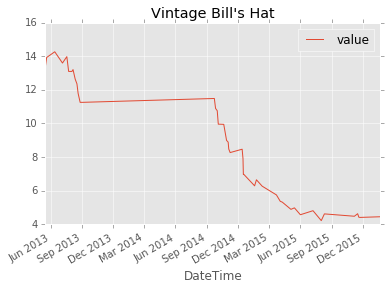

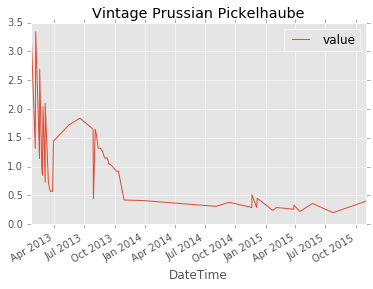

In [163]:
for item in mostPopularVintage:
    plot1 = dfVintage[dfVintage.Name == item]
    plot1Qual = plot1.QualInt.drop_duplicates('last')
    for quality in plot1Qual:
        plot2 = plot1[plot1.QualInt == quality]
        qualityString = None
        for key, value in qualityDict.iteritems():
            if (key == quality):
                qualityString = qualityDict[quality]
        titl = str(qualityString) + " " + item
        plot2.plot(x='DateTime',y='value',title=titl)